In [ ]:
import numpy as np
import pandas as pd

In [5]:
# to see the whole dataframe
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv(r"C:\Users\Cyrus\Documents\Data Projects\bbc nlp\data\business\business.csv")

,Category,Text,Filename,Subcategory
0,business,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.\n",data/business/001.txt,NaN
1,business,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's polic

In [7]:
df.head()

,Category,Text,Filename,Subcategory
0,business,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.\n",data/business/001.txt,NaN
1,business,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's polic

In [ ]:
# Check dataset shape
print("Shape:", df.shape)

# Null values
print("\nNull values:")
print(df.isnull().sum())

# Duplicate rows
print("\nDuplicates:", df.duplicated().sum())

# Count duplicates only in the Text column
dup_text_count = df["Text"].duplicated().sum()
print("Duplicate Text rows:", dup_text_count)

# Show the actual duplicate texts (if any)
dup_texts = df[df["Text"].duplicated(keep=False)].sort_values("Text")
print(dup_texts)

Shape: (510, 4)

Null values:
Category         0
Text             0
Filename         0
Subcategory    510
dtype: int64

Duplicates: 0
Duplicate Text rows: 7
     Category  \
213  business   
239  business   
6    business   
252  business   
257  business   
355  business   
214  business   
493  business   
255  business   
370  business   
291  business   
415  business   
264  business   
332  business   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Remove Duplicate Texts

In [9]:
# Drop duplicates in the Text column, keep first occurrence
df = df.drop_duplicates(subset=["Text"]).reset_index(drop=True)

print("After dropping duplicate texts:", df.shape)
print("Remaining duplicates in Text:", df["Text"].duplicated().sum())


After dropping duplicate texts: (503, 4)
Remaining duplicates in Text: 0


Filter Out Very Short News

In [10]:
# Add word count column
df["word_count"] = df["Text"].apply(lambda x: len(x.split()))

# Drop very short texts (e.g., < 30 words)
df = df[df["word_count"] > 30].reset_index(drop=True)

print("After filtering short docs:", df.shape)

After filtering short docs: (503, 5)


Data Cleaning 

In [ ]:
import re

# Cleaning Function
def clean_text(text):
    """
    Lightly cleans raw news text for embeddings:
    - Removes extra line breaks/tabs
    - Normalizes common quotes/apostrophes
    - Keeps punctuation (! ? : ; - / @ &) since LLM embeddings benefit from context
    - Collapses multiple spaces
    """
    # 1. Remove line breaks & tabs
    text = text.replace("\n", " ").replace("\t", " ")

    # 2. Normalize quotes/apostrophes
    text = re.sub(r"[“”]", '"', text)
    text = re.sub(r"[‘’]", "'", text)

    # 3. Keep most punctuation, only strip weird unicode
    text = re.sub(r"[^\x00-\x7F]+", " ", text)  # remove non-ASCII symbols

    # 4. Collapse multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text


# Apply to DataFrame 
def clean_dataframe(df):
    if "Text" not in df.columns:
        raise KeyError("DataFrame must have a 'Text' column")

    df["Clean_Text"] = df["Text"].astype(str).apply(clean_text)
    df = df[df["Clean_Text"].str.strip() != ""].reset_index(drop=True)

    return df


# Example run
df_clean = clean_dataframe(df)
print(df_clean[["Category", "Clean_Text"]].head(3))


   Category  \
0  business   
1  business   
2  business   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [12]:
df.head()

,Category,Text,Filename,Subcategory,word_count,Clean_Text
0,business,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.\n",data/business/001.txt,NaN,421,"Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn ( 600m) for the three months to December, from $639m year-earlier. The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL. Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding. Time Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% 

In [ ]:
# Set device
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


Embedding each article with OpenAI

In [ ]:
import pandas as pd
import hdbscan
from sklearn.metrics.pairwise import cosine_distances
from openai import OpenAI
import json
import random

# Setup client
client = OpenAI(api_key="")


#  Embedding
def get_embedding(text, model="text-embedding-3-large"):
    response = client.embeddings.create(input=text, model=model)
    return response.data[0].embedding


# Labeling with GPT
def label_cluster(docs):
    """Label a group of documents with broad reusable categories"""
    sample_text = "\n---\n".join(docs[:3])  # up to 3 docs
    prompt = f"""
You are a topic labeling assistant. 
Your task is to assign a broad, reusable subtopic label.

Here are some example news articles from the same cluster:
{sample_text}

Guidelines:
- Labels must be broad enough to apply to many similar texts.  
- Use **general categories** like "Stock Market", "Company News", "Football", "Olympics", "Elections", "Trade Disputes".  
- Avoid overly specific event names or one-off labels.  
- Keep labels **1–3 words maximum**.  
- Prefer terms that can group other articles in the same domain.  

Respond in JSON format: {{"label": "your label here"}}
"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    try:
        return json.loads(response.choices[0].message.content)["label"]
    except:
        return response.choices[0].message.content.strip()


def label_single_doc(text):
    """Label a business article with predefined categories, with flexibility for new ones"""
    first_sentence = text.split(".")[0]
    prompt = f"""You are a topic labeling assistant.
Your task is to assign a broad reusable subtopic label for a business news article.

Here is a news snippet:
{first_sentence}

Guidelines:
- Prefer one of these predefined business categories if possible:
  ["Stock Market", "Mergers", "Company News", "Regulation", "Trade Disputes", 
   "Banking", "Energy", "Technology", "Employment", "Economy"]  
- If the text does not fit any of these, propose a concise new label (1–3 words).  
- Keep labels broad, reusable, and no more than 3 words.  
- Avoid event-specific or one-off names.  

Respond in JSON format: {{"label": "your label here"}}
"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    try:
        return json.loads(response.choices[0].message.content)["label"]
    except:
        return response.choices[0].message.content.strip()


In [ ]:
# Main loop
results = []

for cat, group in df.groupby("Category"):
    print(f"\nProcessing category: {cat}, n={len(group)}")

    # Step 1: Embeddings
    group["embedding"] = group["Clean_Text"].apply(get_embedding)
    X = np.array(group["embedding"].to_list())

    # Step 2: Cosine distance
    cosine_dist = cosine_distances(X)

    # Step 3: HDBSCAN clustering
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=5,
        min_samples=3,
        metric="precomputed",
        cluster_selection_method="leaf"
    )
    group["Subcluster"] = clusterer.fit_predict(cosine_dist)

    # Step 4: Label clusters
    cluster_labels = {}
    for cluster_id in set(group["Subcluster"]):
        docs = group[group["Subcluster"] == cluster_id]["Clean_Text"].tolist()
        
        if cluster_id == -1:  
            # Noise → label individually
            for idx, doc in group[group["Subcluster"] == -1].iterrows():
                group.at[idx, "Subtopic_Label"] = label_single_doc(doc["Clean_Text"])
        else:
            # Label real clusters
            sample_docs = random.sample(docs, min(3, len(docs)))
            cluster_labels[cluster_id] = label_cluster(sample_docs)
            group.loc[group["Subcluster"] == cluster_id, "Subtopic_Label"] = cluster_labels[cluster_id]

    results.append(group)

# Final combined dataframe
df_subtopics = pd.concat(results).reset_index(drop=True)

# Preview
print(df_subtopics[["Category", "Subcluster", "Subtopic_Label", "Clean_Text"]].head(20))





Processing category: business, n=503
    Category  Subcluster      Subtopic_Label  \
0   business          -1        Company News   
1   business          18    Currency Markets   
2   business           4  Corporate Disputes   
3   business           6    Airline Industry   
4   business          -1             Mergers   
5   business          12    Economic Outlook   
6   business          -1          Employment   
7   business          -1      Trade Disputes   
8   business          -1             Economy   
9   business           0    Tobacco Industry   
10  business          -1        Company News   
11  business          -1              Energy   
12  business          -1        Company News   
13  business          -1          Employment   
14  business          -1          Regulation   
15  business          -1             Economy   
16  business           1        Company News   
17  business          -1             Economy   
18  business          -1          Regulation   
19

In [16]:
summary = df_subtopics.groupby(["Category", "Subtopic_Label"]).size().reset_index(name="Count")
print(summary.sort_values("Count", ascending=False).head(20))


    Category      Subtopic_Label  Count
5   business        Company News    114
14  business             Economy     62
6   business  Corporate Disputes     35
24  business             Mergers     29
28  business          Regulation     29
30  business        Stock Market     23
3   business             Banking     19
7   business   Corporate Mergers     18
15  business          Employment     18
29  business        Retail Sales     14
0   business  Aerospace Industry     13
9   business    Currency Markets     12
11  business     Economic Impact     12
13  business     Economic Trends     12
20  business      Housing Market     10
16  business              Energy      9
25  business          Oil Prices      8
1   business    Airline Industry      8
12  business    Economic Outlook      7
18  business            Football      7


In [17]:
top_subtopics = (
    df_subtopics.groupby(["Category", "Subtopic_Label"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Category", "Count"], ascending=[True, False])
)

# Get top 5 per category
top5_per_category = top_subtopics.groupby("Category").head(5)
print(top5_per_category)


    Category      Subtopic_Label  Count
5   business        Company News    114
14  business             Economy     62
6   business  Corporate Disputes     35
24  business             Mergers     29
28  business          Regulation     29


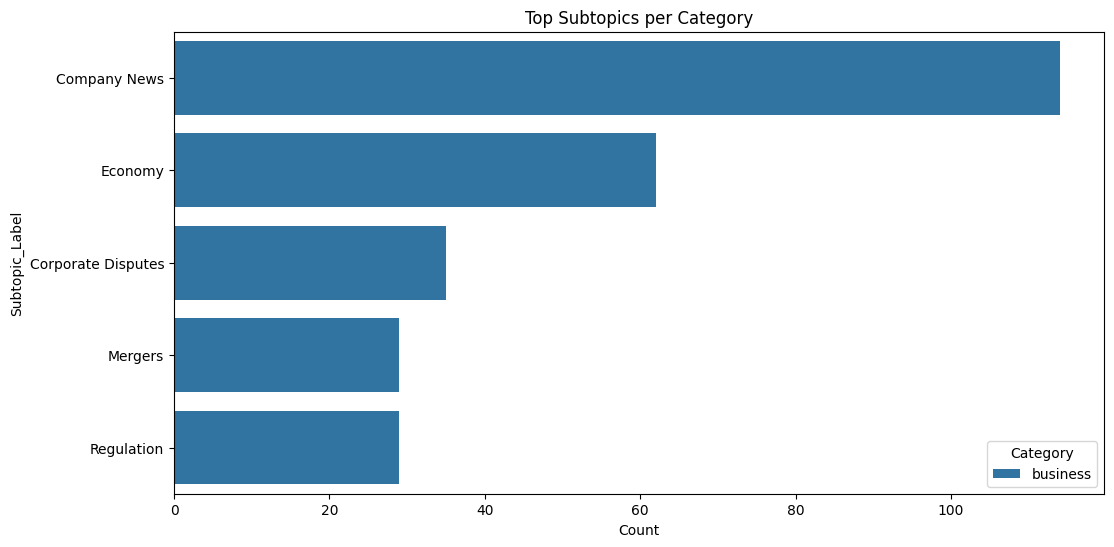

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=top5_per_category,
    x="Count", y="Subtopic_Label", hue="Category"
)
plt.title("Top Subtopics per Category")
plt.show()


We can regex clean those:

In [20]:
import re

def clean_label(label):
    if not isinstance(label, str):
        return label
    # If GPT returned JSON-like text, extract inside
    match = re.search(r'"label"\s*:\s*"([^"]+)"', label)
    if match:
        return match.group(1)
    return label.strip()

df_subtopics["Subtopic_Label"] = df_subtopics["Subtopic_Label"].apply(clean_label)

Rerunning the summary

In [21]:
summary = (
    df_subtopics.groupby(["Category", "Subtopic_Label"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Category", "Count"], ascending=[True, False])
)

top5_per_category = summary.groupby("Category").head(5)
print(top5_per_category)


    Category      Subtopic_Label  Count
5   business        Company News    114
14  business             Economy     62
6   business  Corporate Disputes     35
24  business             Mergers     29
28  business          Regulation     29


save the full results into a DataFrame and export to CSV for further analysis or visualization.

In [25]:
import pandas as pd

# Ensure df_subtopics already has:
# Category, Subcluster, Subtopic_Label, Clean_Text

# Save the full detailed dataset
df_subtopics.to_csv("bbc_business_subtopics_full.csv", index=False)

# Also save the summarized counts per category/subtopic
summary = (
    df_subtopics.groupby(["Category", "Subtopic_Label"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Category", "Count"], ascending=[True, False])
)
summary.to_csv("bbc_business_subtopics_summary.csv", index=False)

print("✅ Files saved:")
print(" - bbc_subtopics_full.csv  (all rows with labels)")
print(" - bbc_subtopics_summary.csv  (aggregated counts)")


✅ Files saved:
 - bbc_subtopics_full.csv  (all rows with labels)
 - bbc_subtopics_summary.csv  (aggregated counts)
